<a href="https://colab.research.google.com/github/KTB2110/PortfolioProjects/blob/Projects/SentimentAnalysisFINVIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to Sentiment Analysis of Stocks powered by FINVIZ**

**This program enables you to obtain information on the sentiment of your desired stock listing/Company over the last few days based on recent articles published pertaining to the Company.**

### Please run the code chunks below!

In [98]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from plotnine import *
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
df = pd.read_csv("stocks.csv")
df = df[['Symbol', 'Name']]

df['Symbol'] = df['Symbol'].str.upper()
df['Name'] = df['Name'].str.upper()
# stock_dict = df.set_index('Symbol').T.to_dict()
stock_dict = pd.Series(df.Symbol.values,index=df.Name).to_dict()
reverse_dict = pd.Series(df.Name.values,index=df.Symbol).to_dict()

### Run this code block below and provide input!


In [100]:
tickers = []
search_results = []
while True:
  print("Welcome to Stock Sentiment Analysis Powered by FINVIZ")
  print("Please enter the stocks you want to analyze one-by-one when prompted.\nType 'Default' if you want to see how we work with a sample list of stock listings!\nType 'Done' when you are done entering your desired stock listings!")

  search = input("Enter desired stock name or company name:\n")
  search = search.upper()
  
  while((search != 'DONE') and (search != 'DEFAULT')):
    
    score = 0
    for value in stock_dict.values():
      if search == value:
        tickers.append(value)
        score = 1
        break

    for key in stock_dict.keys():
      if search in key:
        tickers.append(stock_dict[key])
        score = 1
        break

    if (score == 0):
      print("There seems to be an error in what you have entered.\nPlease check for correct Stock Name or Company Name and Try Again!")

    search = input("Enter desired stock name or company name:\n")
    search = search.upper()
  
  if (search == 'DEFAULT'):
    tickers = ['AMZN', "GOOG", "FB"]
    print("Thank you. \nAnalyzing...")
    break
  elif (search == 'DONE'):
    print("Thank you. \nAnalyzing...")
    break


Welcome to Stock Sentiment Analysis Powered by FINVIZ
Please enter the stocks you want to analyze one-by-one when prompted.
Type 'Default' if you want to see how we work with a sample list of stock listings!
Type 'Done' when you are done entering your desired stock listings!
Enter desired stock name or company name:
Microsoft
Enter desired stock name or company name:
Amazon
Enter desired stock name or company name:
GOOG
Enter desired stock name or company name:
Askdjkf
There seems to be an error in what you have entered.
Please check for correct Stock Name or Company Name and Try Again!
Enter desired stock name or company name:
Netflix
Enter desired stock name or company name:
Done
Thank you. 
Analyzing...


## RUN ALL THE REMAINING CODE BLOCKS

In [101]:
print(tickers)
finviz_url = 'https://finviz.com/quote.ashx?t='
# tickers = ['AMZN', "GOOG", "FB"]

news_tables = {}

['MSFT', 'AMZN', 'GOOG', 'NFLX']


In [102]:
for ticker in tickers:
  url = finviz_url + ticker

  req = Request(url = url, headers = {'user-agent' : 'my-app'})
  response = urlopen(req)
  
  html = BeautifulSoup(response, 'html')
  news_table = html.find(id = 'news-table')
  news_tables[ticker] = news_table

In [103]:
parsed_data = []

In [104]:
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0]
    else :
      time = date_data[1]
      date = date_data[0]

    parsed_data.append([ticker, date, time, title])

In [105]:
df = pd.DataFrame(parsed_data, columns = ['Ticker', 'Date', "Time", "Title"])

vader = SentimentIntensityAnalyzer()
df['compound'] = df['Title'].apply(lambda title: vader.polarity_scores(title)['compound'])

In [106]:
df['Date'] = pd.to_datetime(df.Date).dt.date

<Figure size 1440x216 with 0 Axes>

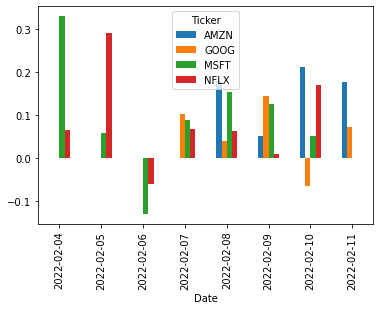

In [107]:
plt.figure(figsize=(20,3))
mean_df = df.groupby(['Ticker', 'Date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()
mean_df.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()